In [1]:
import pandas as pd
import torch
import re
import numpy as np

[NLP Augmentation ]("https://neptune.ai/blog/data-augmentation-nlp")

## **install**

In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.1 MB/s eta 0:00:00


In [ ]:
!pip install tqdm matplotlib

In [ ]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.1 MB/s eta 0:00:00


In [ ]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=c2605917b149a51df3aa66c88d0cdad32372ee3564027cb147f79aa0f4e463aa
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling ch

## **Set Train**

In [ ]:
# 데이터 로드
train = pd.read_csv('/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/train.csv')
test = pd.read_json('/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/test.json').transpose()

In [ ]:
train

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
...,...,...,...
3945,3945,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...
3946,3946,갈취 대화,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...
3947,3947,직장 내 괴롭힘 대화,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...
3948,3948,갈취 대화,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...


In [ ]:
def clean_text(text):
    # 특수문자
    text = re.sub(r'[^가-힣a-z\s]', ' ', text)
    # Remove extra spaces
    text = ' '.join(text.split())
    # 한국어 불용어 리스트
    stopwords = [
        '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니',
        '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하',
        '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회',
        '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하',
        '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '내', '경우',
        '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개',
        '전', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓'
    ]
    # 불용어 제거
    text = ' '.join(word for word in text.split() if word not in stopwords)
    return text

In [ ]:
# train과 test 데이터의 텍스트 열 정규화
train['conversation'] = train['conversation'].apply(clean_text)
test['text'] = test['text'].apply(clean_text)

In [ ]:
train

,idx,class,conversation
0,0,협박 대화,너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자 죽지 우...
1,1,협박 대화,길동경찰서입니다 시 분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 얘기한다 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...
3,3,갈취 대화,어이 거기 예 너 말이야 너 이리 오라고 무슨 너 옷 좋아보인다 얘 돈 있나봐 아니...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요 저희 회사에서 선크림 파는데 손등에 발라보실래요 ...
...,...,...,...
3945,3945,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐 머리가 뭐 밥먹으면 대가리만 크냐 너는 무슨 머리...
3946,3946,갈취 대화,내가 너 아들 김길준 데리고 있어 살리고 싶으면 계좌에 억만 보내 예 선생님 진정하...
3947,3947,직장 내 괴롭힘 대화,나는 같은 보면 참 신기하더라 어떻게 저렇게 살지 왜 그래 들리겠어 들리라고 해 못...
3948,3948,갈취 대화,누구맘대로 여기서 장사하래 이게 무슨일입니까 남의 구역에서 장사하려면 자릿세를 내야...


In [ ]:
# 지정된 클래스를 숫자로 인코딩
label_dict = {
    '협박 대화': 0,
    '갈취 대화': 1,
    '직장 내 괴롭힘 대화': 2,
    '기타 괴롭힘 대화': 3
}
train['label_encoded'] = train['class'].map(label_dict)

In [ ]:
train

,idx,class,conversation,label_encoded
0,0,협박 대화,너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자 죽지 우...,0
1,1,협박 대화,길동경찰서입니다 시 분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 얘기한다 ...,0
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...,3
3,3,갈취 대화,어이 거기 예 너 말이야 너 이리 오라고 무슨 너 옷 좋아보인다 얘 돈 있나봐 아니...,1
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요 저희 회사에서 선크림 파는데 손등에 발라보실래요 ...,1
...,...,...,...,...
3945,3945,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐 머리가 뭐 밥먹으면 대가리만 크냐 너는 무슨 머리...,3
3946,3946,갈취 대화,내가 너 아들 김길준 데리고 있어 살리고 싶으면 계좌에 억만 보내 예 선생님 진정하...,1
3947,3947,직장 내 괴롭힘 대화,나는 같은 보면 참 신기하더라 어떻게 저렇게 살지 왜 그래 들리겠어 들리라고 해 못...,2
3948,3948,갈취 대화,누구맘대로 여기서 장사하래 이게 무슨일입니까 남의 구역에서 장사하려면 자릿세를 내야...,1


In [ ]:
import pandas as pd

# 원본 데이터 로딩
data = train

# 데이터를 1000개씩 분할하여 저장
batch_size = 1000
num_batches = len(data) // batch_size + 1

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = (batch_idx + 1) * batch_size
    batch_data = data[start_idx:end_idx]

    # CSV 파일로 저장
    batch_filename = f"batch_{batch_idx + 1}.csv"
    batch_data.to_csv(batch_filename, index=False)
    print(f"Batch {batch_idx + 1} saved to {batch_filename}")


Batch 1 saved to batch_1.csv
Batch 2 saved to batch_2.csv
Batch 3 saved to batch_3.csv
Batch 4 saved to batch_4.csv


## **BackTranslation**
- 한국어 to 영어, 이후 다시 한국어로 번역하여 데이터 증폭

In [ ]:
# # ReadTimeout: The read operation timed out

# import pandas as pd
# from googletrans import Translator

# # 데이터 로드
# data = train

# # Google Translate API를 초기화
# translator = Translator()

# # 새로운 데이터 프레임 생성
# augmented_data = pd.DataFrame(columns=['idx', 'class', 'conversation', 'label_encoded'])

# # 데이터 증폭 및 변환
# for idx, row in data.iterrows():
#     conversation = row['conversation']
#     label_encoded = row['label_encoded']
#     class_name = row['class']

#     # 한국어에서 영어로 번역
#     translated_conversation_en = translator.translate(conversation, src='ko', dest='en').text

#     # 영어에서 한국어로 다시 번역
#     translated_conversation_ko = translator.translate(translated_conversation_en, src='en', dest='ko').text

#     # 데이터 프레임에 추가
#     augmented_data = augmented_data.append({'idx': idx,
#                                             'class': class_name,
#                                             'conversation': translated_conversation_ko,
#                                             'label_encoded': label_encoded},
#                                            ignore_index=True)

# # 결과를 CSV 파일로 저장
# augmented_data.to_csv('augmented_dataset.csv', index=False)


In [ ]:
## fail
# runtime error

# import pandas as pd
# from transformers import MarianTokenizer, MarianMTModel
# from tqdm import tqdm  # 진행 상황 표시를 위한 tqdm 추가
# import matplotlib.pyplot as plt

# # 데이터 로드
# data = train

# # 모델과 토크나이저 초기화
# model_name = "Helsinki-NLP/opus-mt-ko-en"  # 한국어에서 영어로 번역 모델
# tokenizer = MarianTokenizer.from_pretrained(model_name)
# model = MarianMTModel.from_pretrained(model_name)

# # 진행 상황 기록을 위한 리스트 초기화
# progress = []

# # 새로운 데이터 프레임 생성
# augmented_data = pd.DataFrame(columns=['idx', 'class', 'conversation', 'label_encoded'])

# # 데이터 증폭 및 변환
# for idx, row in tqdm(data.iterrows(), total=len(data)):  # tqdm으로 진행 상황 표시
#     conversation = row['conversation']
#     label_encoded = row['label_encoded']
#     class_name = row['class']

#     try:
#         # 한국어에서 영어로 번역
#         translated_conversation_en = model.generate(**tokenizer(conversation, return_tensors="pt", padding=True, truncation=True, max_length=128)).tolist()
#         translated_conversation_en = tokenizer.decode(translated_conversation_en[0], skip_special_tokens=True)

#         # 영어에서 한국어로 번역
#         translated_conversation_ko = model.generate(**tokenizer(translated_conversation_en, return_tensors="pt", padding=True, truncation=True, max_length=128)).tolist()
#         translated_conversation_ko = tokenizer.decode(translated_conversation_ko[0], skip_special_tokens=True)

#         # 데이터 프레임에 추가
#         augmented_data = augmented_data.append({'idx': idx,
#                                                 'class': class_name,
#                                                 'conversation': translated_conversation_ko,
#                                                 'label_encoded': label_encoded},
#                                                ignore_index=True)

#         # 진행 상황 기록 (예: 번역된 데이터 수)
#         progress.append(idx + 1)
#     except Exception as e:
#         print(f"Error translating row {idx}: {str(e)}")

# # 결과를 CSV 파일로 저장
# augmented_data.to_csv('augmented_dataset.csv', index=False)

# # 진행 상황 그래프 생성
# plt.plot(progress)
# plt.xlabel('Data Index')
# plt.ylabel('Progress')
# plt.title('Translation Progress')
# plt.show()

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
  0%|          | 0/3950 [00:00<?, ?it/s]<ipython-input-15-25cc8118047e>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append({'idx': idx,
  0%|          | 1/3950 [00:06<7:39:42,  6.98s/it]<ipython-input-15-25cc8118047e>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append({'idx': idx,
  0%|          | 2/3950 [00:09<4:55:05,  4.48s/it]<ipython-input-15-25cc8118047e>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append({'i

KeyboardInterrupt: ignored

## **Augmentation With LLaMa2**

[LLaMa2 load 참고]("https://yunwoong.tistory.com/252")

In [3]:
!pip install -q transformers accelerate sentencepiece
!huggingface-cli login

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.9 MB/s eta 0:00:00

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, TextGenerationPipeline
import torch

MODEL_NAME = "meta-llama/Llama-2-7b-chat-hf"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_auth_token=True)
language_model = AutoModelForCausalLM.from_pretrained(MODEL_NAME)

text_generation_pipeline = TextGenerationPipeline(
    model=language_model,
    tokenizer=tokenizer,
    torch_dtype=torch.float16,
    device=0,
)

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/tokenization_auto.py:640: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
import pandas as pd

# 파일 경로 설정
batch_filepaths = {
    'batch_1': '/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_1.csv',
    'batch_2': '/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_2.csv',
    'batch_3': '/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_3.csv',
    'batch_4': '/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_4.csv'
}

# clean_text 함수 정의
def clean_text(text):
    # 특수문자
    text = re.sub(r'[^가-힣a-z\s]', ' ', text)
    # Remove extra spaces
    text = ' '.join(text.split())
    # 한국어 불용어 리스트
    stopwords = [
        '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니',
        '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하',
        '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회',
        '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하',
        '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '내', '경우',
        '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개',
        '전', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓'
    ]
    # 불용어 제거
    text = ' '.join(word for word in text.split() if word not in stopwords)

    return text

# 각 배치 파일에 대해 데이터 불러오기 및 전처리 적용
for batch_name, batch_filepath in batch_filepaths.items():
    data_batch = pd.read_csv(batch_filepath)
    data_batch['conversation'] = data_batch['conversation'].apply(clean_text)

    # 전처리가 적용된 데이터를 딕셔너리 변수에 저장
    globals()[batch_name] = data_batch

print("불러오기 및 전처리 완료")


불러오기 및 전처리 완료


In [ ]:
batch_1

,idx,class,conversation,label_encoded
0,0,협박 대화,너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자 죽지 우...,0
1,1,협박 대화,길동경찰서입니다 시 분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 얘기한다 ...,0
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...,3
3,3,갈취 대화,어이 거기 예 너 말이야 너 이리 오라고 무슨 너 옷 좋아보인다 얘 돈 있나봐 아니...,1
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요 저희 회사에서 선크림 파는데 손등에 발라보실래요 ...,1
...,...,...,...,...
995,995,직장 내 괴롭힘 대화,너이거 이렇게 하라했어안했어 네 저번에 선배님이 설명해주신대로 했는데요 장난해 내가...,2
996,996,기타 괴롭힘 대화,민수야 너는 왜이렇게 못생겼냐 아니야 나는 못생기지않았어 민수야 너는 왜이렇게 못생...,3
997,997,협박 대화,어이 김사장 내일이 돈 갚기로 한날인거 알지 네 박사장님 알고 있는데요 며칠만 연기...,0
998,998,기타 괴롭힘 대화,최민기 너 핫스팟 껐냐 어 아 이번 달 데이터 다 끝나서 아 니가 그걸 끄면 내가 ...,3


In [ ]:
batch_2

,idx,class,conversation,label_encoded
0,1000,기타 괴롭힘 대화,우와 아 너 이번에 올라온 사진 정말 예쁘더라 아 응 고마워 그래서 사진 보고 너가...,3
1,1001,기타 괴롭힘 대화,얘들아 선생님이 다음 수업은 실습실에서 한데 야 어제 그거 개웃기지 않았냐 그거 진...,3
2,1002,협박 대화,이거 싸이코 새끼였네 너 돌았냐 죽일일 있어 너 이새끼 깜빵 쳐가자 안되겠어 미친놈...,0
3,1003,직장 내 괴롭힘 대화,이게 니가 일주일동안 거야 네 죄송합니다 시간동안 고작 이거밖에 못해 죄송합니다 쓸...,2
4,1004,갈취 대화,거기 회색 교복 치마 입은 애기야 이리 와 바 저요 응 너 말고 누가 있어 왜 부르...,1
...,...,...,...,...
995,1995,갈취 대화,돈 내놔 누구세요 누군지 거 없고 다치기 싫으면 내놔 돈 없어요 천호동 사는데 돈이...,1
996,1996,기타 괴롭힘 대화,아파 아야 표정 썩는 거 봐 아팠어 아 미안 하지마 그만해 이제 니 차례야 니가 때...,3
997,1997,직장 내 괴롭힘 대화,혹시 민지님 맞나요 다른게 아니고 회사 워크숍 있잖아 아직 도착전이야 다 도착해있는...,2
998,1998,협박 대화,너 내가 좋은 말로 할 빌린 돈 내놔 아직 월급이 들어와서 여윳돈이 없다구 너 내가...,0


In [ ]:
batch_3

,idx,class,conversation,label_encoded
0,2000,협박 대화,과거 니가 인터넷에 글 올렸어 어 맞아 니 되는꼴 보기싫어서 글 올렸다 왜 정신이 ...,0
1,2001,기타 괴롭힘 대화,야 찐따 응 가서 빵좀사와 그래 우유도같이 돈은 니돈으로사 임마 돈이 없는데 어쭈 ...,3
2,2002,직장 내 괴롭힘 대화,너 일로 와봐 네 너희 아까 손님들 앞에서 너희끼리 떠들면서 웃었니 네 아니요 아까...,2
3,2003,기타 괴롭힘 대화,아가씨 시간있어 얼굴도 이쁘고 몸매도 크흐 자연인가 네 불쾌하네요 뭐가 이쁘다고 칭...,3
4,2004,직장 내 괴롭힘 대화,김주임 처리 똑바로 안할거야 죄송합니다 부장님 자네 동기들은 다 벌써 대리고 과장이...,2
...,...,...,...,...
995,2995,협박 대화,한번더 기회를 줄까 제가 뭘 잘못했나요 어쭈 네 잘생각해봐 일분내 생각하지않으면 칼...,0
996,2996,직장 내 괴롭힘 대화,아 뭐하냐 김사원 죄송합니다 씨발 뭐하는짓이야 못봤어요 팔팔 끓는물을 붓는건뭐냐고 ...,2
997,2997,직장 내 괴롭힘 대화,김대리 이걸 작업이라고 해 온 건가 네 아주 엉망이야 초등학생도 이거보다 잘하겠어 ...,2
998,2998,갈취 대화,하늘아 쇼핑갈래 어 쇼핑 웅 내가 애들이랑 쇼핑가는데 너 껴줄게 고마워 고맙긴 근데...,1


In [ ]:
batch_4

,idx,class,conversation,label_encoded
0,3000,기타 괴롭힘 대화,넌 왜 이렇게 몸에 털이 많아 이거 유전이야 아 너희 부모님도 털이 많아 어 어 꼭...,3
1,3001,직장 내 괴롭힘 대화,간호사 어제 채혈 다하고 산소도 측정도 다 해놓고 퇴근한거니 아 죄송합니다 다 마무...,2
2,3002,갈취 대화,당신 와이프 이쁘더라 제발 저하고만 이야기 나눠주세요 깔끔하게 지장 찍어 갑자기 그...,1
3,3003,직장 내 괴롭힘 대화,너 내가 시까지 오라고 안했어 그렇지만 과장님 시까지가 근무 시작인데요 신입이 빠져...,2
4,3004,직장 내 괴롭힘 대화,김 대리 남친 있어 네 와 남친 잘생겼겠네 남친이 잘해 줘 그게 왜 궁금하시죠 왜 ...,2
...,...,...,...,...
945,3945,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐 머리가 뭐 밥먹으면 대가리만 크냐 너는 무슨 머리...,3
946,3946,갈취 대화,내가 너 아들 김길준 데리고 있어 살리고 싶으면 계좌에 억만 보내 예 선생님 진정하...,1
947,3947,직장 내 괴롭힘 대화,나는 같은 보면 참 신기하더라 어떻게 저렇게 살지 왜 그래 들리겠어 들리라고 해 못...,2
948,3948,갈취 대화,누구맘대로 여기서 장사하래 이게 무슨일입니까 남의 구역에서 장사하려면 자릿세를 내야...,1


In [ ]:
import pandas as pd
from tqdm import tqdm

# 토크나이저 로딩
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_auth_token=True)

# Augmentation 함수
def augment_text(data_batch):
    # Augmentation된 데이터를 저장할 데이터프레임 초기화
    augmented_data = pd.DataFrame(columns=["idx", "class", "conversation", "augmented_conversation", "label_encoded"])

    for idx, row in tqdm(data_batch.iterrows(), total=len(data_batch), desc="Augmenting"):
        text = row['conversation']
        # 텍스트를 토큰화하여 토큰 수 계산
        tokens = tokenizer.tokenize(text)

        generation_options = {
            "max_length": 512,  # 생성할 텍스트의 최대 토큰 수
            "num_return_sequences": 1,  # 생성할 문장의 수 (한 문장만 생성)
            "do_sample": True,  # 샘플링 여부 (샘플링을 통해 다양한 결과를 얻을 수 있음)
        }

        # LLaMa2를 사용하여 텍스트 증강
        generated_texts = text_generation_pipeline(text, **generation_options)

        # 생성된 텍스트 중 첫 번째 문장을 반환하고 원본 레이블을 유지
        augmented_conversation = generated_texts[0]['generated_text']

        # 새로운 행을 생성하여 데이터프레임에 추가
        augmented_row = {
            "idx": idx,
            "class": row["class"],
            "conversation": row["conversation"],
            "augmented_conversation": augmented_conversation,
            "label_encoded": row["label_encoded"]
        }

        augmented_data = augmented_data.append(augmented_row, ignore_index=True)

    return augmented_data

batch_filenames = [
    '/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_1.csv',
    '/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_2.csv',
    '/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_3.csv',
    '/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_4.csv'
]

for batch_filename in batch_filenames:
    print("======================================================================================================================================================================================================")
    print(f"{batch_filename} 수행 중")
    print("======================================================================================================================================================================================================")
    print()
    print()
    data_batch = pd.read_csv(batch_filename)
    augmented_data_batch = augment_text(data_batch)

    # 각 배치에 대한 Augmentation 결과를 파일로 저장
    output_filename = batch_filename.replace(".csv", "_augmented.csv")
    augmented_data_batch.to_csv(output_filename, index=False)

print("Augmentation 완료")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
## 하나하나 돌리면 힘드니까
## 묶어서 한번에 돌리도록 해보자!

# import pandas as pd
# from tqdm import tqdm

# # 원본 데이터 로딩
# data = batch_1

# # 토큰화를 위한 토크나이저 로딩
# tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_auth_token=True)

# # Augmentation을 위한 함수
# def augment_text(row):
#     text = row['conversation']
#     # 텍스트를 토큰화하여 토큰 수를 계산
#     tokens = tokenizer.tokenize(text)

#     generation_options = {
#         "max_length": 512,  # 생성할 텍스트의 최대 토큰 수
#         "num_return_sequences": 1,  # 생성할 문장의 수 (한 문장만 생성)
#         "do_sample": True,  # 샘플링 여부 (샘플링을 통해 다양한 결과를 얻을 수 있음)
#     }

#     # LLaMa2를 사용하여 텍스트 증강
#     generated_texts = text_generation_pipeline(text, **generation_options)

#     # 생성된 텍스트 중 첫 번째 문장을 반환하고 원본 레이블을 유지
#     return {'augmented_conversation': generated_texts[0]['generated_text'], 'label_encoded': row['label_encoded']}

# # Augmentation된 데이터를 생성
# tqdm.pandas()  # tqdm을 사용하여 진행 상황을 모니터링
# augmented_data = data.progress_apply(augment_text, axis=1)

# # Augmentation된 데이터를 데이터프레임으로 변환하여 추가
# augmented_df = pd.DataFrame(list(augmented_data))
# data_augmented = pd.concat([data, augmented_df], axis=1)

# # 결과를 저장
# data_augmented.to_csv("augmented_dataset.csv", index=False)  # 증강된 데이터를 파일로 저장 _ 원본 + Augmentation


/usr/local/lib/python3.10/dist-packages/transformers/models/auto/tokenization_auto.py:640: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
  0%|          | 5/1000 [00:26<1:35:44,  5.77s/it]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1268: UserWarning: Input length of input_ids is 653, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
  1%|          | 8/1000 [00:33<1:04:35,  3.91s/it]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1268: UserWarning: Input length of input_ids is 542, but `max_length` is set to 512. This can lead 

KeyboardInterrupt: ignored

## **Synonym Replacement로 Augmente**

## EDA

**To Do**
- Augmentation use LLaMa2
  - augmented_conversation에 대한 전처리
    - 특수문자 제거
    - 한글만 살리기 with 숫자도 같이 살리기
    - 이모티콘? 제거되는지 확인 _ batch_1_augmented 기준 75줄 확인 "나은씨 네 가서 커피좀 타와"
    - 이후 drop duplicate 해보기
  - 레이블 별 비율 확인
    - 비율이 부족한 label은 좀 더 증강 => 데이터 비율 맞추기
  - augmented_conversation 행을 열로 변경하기
    - 아래쪽에 concat하는 방식으로!
    - Class, Label 유지, index 추가
  - 이후 batch_augmented 1~4.csv를 하나의 csv로 concat
- SR Augmentation
 - ㅇㅇ
---
염려되는 부분 : 데이터 증폭은 했지만, LLaMa2로 증폭한 데이터의 경우, 어색한 문장이 다수 존재. train에 도움이 될까?

In [ ]:
batch_1_arg = pd.read_csv('/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_1_augmented.csv')

In [ ]:
batch_1_arg

,idx,class,conversation,augmented_conversation,label_encoded
0,0,협박 대화,너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자 죽지 우...,너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자 죽지 우...,0
1,1,협박 대화,길동경찰서입니다 시 분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 얘기한다 ...,길동경찰서입니다 시 분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 얘기한다 ...,0
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...,너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...,3
3,3,갈취 대화,어이 거기 예 너 말이야 너 이리 오라고 무슨 너 옷 좋아보인다 얘 돈 있나봐 아니...,어이 거기 예 너 말이야 너 이리 오라고 무슨 너 옷 좋아보인다 얘 돈 있나봐 아니...,1
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요 저희 회사에서 선크림 파는데 손등에 발라보실래요 ...,저기요 혹시 날이 너무 뜨겁잖아요 저희 회사에서 선크림 파는데 손등에 발라보실래요 ...,1
...,...,...,...,...,...
995,995,직장 내 괴롭힘 대화,너이거 이렇게 하라했어안했어 네 저번에 선배님이 설명해주신대로 했는데요 장난해 내가...,너이거 이렇게 하라했어안했어 네 저번에 선배님이 설명해주신대로 했는데요 장난해 내가...,2
996,996,기타 괴롭힘 대화,민수야 너는 왜이렇게 못생겼냐 아니야 나는 못생기지않았어 민수야 너는 왜이렇게 못생...,민수야 너는 왜이렇게 못생겼냐 아니야 나는 못생기지않았어 민수야 너는 왜이렇게 못생...,3
997,997,협박 대화,어이 김사장 내일이 돈 갚기로 한날인거 알지 네 박사장님 알고 있는데요 며칠만 연기...,어이 김사장 내일이 돈 갚기로 한날인거 알지 네 박사장님 알고 있는데요 며칠만 연기...,0
998,998,기타 괴롭힘 대화,최민기 너 핫스팟 껐냐 어 아 이번 달 데이터 다 끝나서 아 니가 그걸 끄면 내가 ...,최민기 너 핫스팟 껐냐 어 아 이번 달 데이터 다 끝나서 아 니가 그걸 끄면 내가 ...,3


### augmented_conversation에 대한 전처리

In [ ]:
def preprocess_text(text):
    # 한글과 숫자만 남기고 모든 특수 문자 및 이모티콘 제거
    text = re.sub(r'[^가-힣0-9]', ' ', text)
    # 여러 개의 연속 공백을 하나의 공백으로 변환
    text = re.sub(r'\s+', ' ', text)
    # 양 끝 공백 제거
    text = text.strip()
    return text

In [ ]:
# 모든 열에 대해 전처리 함수를 적용
for col in batch_1_arg.columns:
    if col != 'idx' and col != 'label_encoded':
        batch_1_arg[col] = batch_1_arg[col].apply(preprocess_text)

batch_1_arg

,idx,class,conversation,augmented_conversation,label_encoded
0,0,협박 대화,너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자 죽지 우...,너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자 죽지 우...,0
1,1,협박 대화,길동경찰서입니다 시 분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 얘기한다 ...,길동경찰서입니다 시 분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 얘기한다 ...,0
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...,너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...,3
3,3,갈취 대화,어이 거기 예 너 말이야 너 이리 오라고 무슨 너 옷 좋아보인다 얘 돈 있나봐 아니...,어이 거기 예 너 말이야 너 이리 오라고 무슨 너 옷 좋아보인다 얘 돈 있나봐 아니...,1
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요 저희 회사에서 선크림 파는데 손등에 발라보실래요 ...,저기요 혹시 날이 너무 뜨겁잖아요 저희 회사에서 선크림 파는데 손등에 발라보실래요 ...,1
...,...,...,...,...,...
995,995,직장 내 괴롭힘 대화,너이거 이렇게 하라했어안했어 네 저번에 선배님이 설명해주신대로 했는데요 장난해 내가...,너이거 이렇게 하라했어안했어 네 저번에 선배님이 설명해주신대로 했는데요 장난해 내가...,2
996,996,기타 괴롭힘 대화,민수야 너는 왜이렇게 못생겼냐 아니야 나는 못생기지않았어 민수야 너는 왜이렇게 못생...,민수야 너는 왜이렇게 못생겼냐 아니야 나는 못생기지않았어 민수야 너는 왜이렇게 못생...,3
997,997,협박 대화,어이 김사장 내일이 돈 갚기로 한날인거 알지 네 박사장님 알고 있는데요 며칠만 연기...,어이 김사장 내일이 돈 갚기로 한날인거 알지 네 박사장님 알고 있는데요 며칠만 연기...,0
998,998,기타 괴롭힘 대화,최민기 너 핫스팟 껐냐 어 아 이번 달 데이터 다 끝나서 아 니가 그걸 끄면 내가 ...,최민기 너 핫스팟 껐냐 어 아 이번 달 데이터 다 끝나서 아 니가 그걸 끄면 내가 ...,3


In [ ]:
# '나은씨' 문자열이 포함된 행을 찾음
contains_naeun = batch_1_arg['augmented_conversation'].str.contains('나은씨')

# '나은씨' 문자열이 포함된 행의 인덱스를 가져옴
rows_with_naeun = batch_1_arg[contains_naeun]

# 결과 출력
print("나은씨 문자열이 포함된 행의 개수:", len(rows_with_naeun))
print("나은씨 문자열이 포함된 행의 인덱스:", rows_with_naeun.index.tolist())

나은씨 문자열이 포함된 행의 개수: 1
나은씨 문자열이 포함된 행의 인덱스: [73]


In [ ]:
batch_1_arg.iloc[73]

idx                                                                      73
class                                                           직장 내 괴롭힘 대화
conversation              나은씨 네 가서 커피좀 타와 제가요 그럼 여기 나은씨가 둘인가 아 저 커피는 왜 나...
augmented_conversation    나은씨 네 가서 커피좀 타와 제가요 그럼 여기 나은씨가 둘인가 아 저 커피는 왜 나...
label_encoded                                                             2
Name: 73, dtype: object

In [ ]:
## 이모티콘 및 특수문자 제거 확인

pd.set_option('display.max_colwidth', None)

row_data = batch_1_arg.iloc[73]
print(row_data)

pd.set_option('display.max_colwidth', 50)

idx                                                                                                                                                                                                                                            73
class                                                                                                                                                                                                                                 직장 내 괴롭힘 대화
conversation                                                                            나은씨 네 가서 커피좀 타와 제가요 그럼 여기 나은씨가 둘인가 아 저 커피는 왜 나은씨 집에서 아빠한테도 커피 한번 안타줘봤어 저희 아빠는 스스로 내려드시는데요 뭐 그럼 여기가 집이랑 같다고 생각하는거야 그건아닌데 하고싶은거만 하면서 있다고 생각해 가서 얼른 타와 입아프니까
augmented_conversation    나은씨 네 가서 커피좀 타와 제가요 그럼 여기 나은씨가 둘인가 아 저 커피는 왜 나은씨 집에서 아빠한테도 커피 한번 안타줘봤어 저희 아빠는 스스로 내려드시는데요 뭐 그럼 여기가 집이랑 같다고 생각하는거야 그건아닌데 하고싶은거만 하면서 있다고 생각해 가서 얼른 타와 입아프니까 저희 아빠는 커피를 집에서 준비하는 것은 아니라서 집에서 커피를 준비하는 것은 아빠가 아닌 여자가 맡는 것이다
label_encoded                   

In [ ]:
## 영어 및 다른 문자들 제거 확인

pd.set_option('display.max_colwidth', None)

row_data = batch_1_arg.iloc[58]
print(row_data)

pd.set_option('display.max_colwidth', 50)

idx                                                                                                                                                           58
class                                                                                                                                                      갈취 대화
conversation                                   친구야 어 무슨 일이야 너 오늘 화장했어 아응 잘먹었다 뭐썼어 아 이거 이번 신상아니야 너무 이쁘다 갖구 싶어 아 별로 안비싸던데 그래 별로 안비싸니까 니가 새거사면 되겠다 그치 어 그건 얼른 줘 친구야
augmented_conversation    친구야 어 무슨 일이야 너 오늘 화장했어 아응 잘먹었다 뭐썼어 아 이거 이번 신상아니야 너무 이쁘다 갖구 싶어 아 별로 안비싸던데 그래 별로 안비싸니까 니가 새거사면 되겠다 그치 어 그건 얼른 줘 친구야 너 잘못 말씀하지 않아 너 잘 알아요
label_encoded                                                                                                                                                  1
Name: 58, dtype: object


In [ ]:
## 모든 세트에 대해 적용

import pandas as pd
import re

# 전처리 함수
def preprocess_text(text):
    # 한글과 숫자만 남기고 모든 특수 문자 및 이모티콘 제거
    text = re.sub(r'[^가-힣0-9]', ' ', text)
    # 여러 개의 연속 공백을 하나의 공백으로 변환
    text = re.sub(r'\s+', ' ', text)
    # 양 끝 공백 제거
    text = text.strip()
    return text

# 파일 경로 리스트
file_paths = [
    '/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_1_augmented.csv',
    '/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_2_augmented.csv',
    '/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_3_augmented.csv',
    '/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_4_augmented.csv'
]

# 파일 경로와 목적 파일 이름의 매핑
output_file_names = [
    ('batch_1_arg', 'batch_1_merge.csv'),
    ('batch_2_arg', 'batch_2_merge.csv'),
    ('batch_3_arg', 'batch_3_merge.csv'),
    ('batch_4_arg', 'batch_4_merge.csv')
]

# 파일 별로 작업을 반복
for file_path, (input_name, output_name) in zip(file_paths, output_file_names):
    # 데이터 불러오기
    df = pd.read_csv(file_path)

    # 전처리 적용
    for col in df.columns:
        if col != 'idx' and col != 'label_encoded':
            df[col] = df[col].apply(preprocess_text)

    # 새로운 데이터프레임 생성
    new_data = {
        'idx': df['idx'],  # 인덱스 데이터
        'class': df['class'],  # 클래스 데이터
        'conversation': df['augmented_conversation'],  # 새로운 대화 데이터
        'label_encoded': df['label_encoded']  # 레이블 인코딩 데이터
    }

    new_df = pd.DataFrame(new_data)

    # 열 삭제
    df = df.drop(columns=['augmented_conversation'])

    # 데이터프레임 합병
    combined_df = pd.concat([df, new_df], ignore_index=True)

    # 결과 파일 저장
    combined_df.to_csv(output_name, index=False)

print("작업 완료")


작업 완료


In [ ]:
batch_1_mer = pd.read_csv('/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_1_merge.csv')

batch_1_mer

,idx,class,conversation,label_encoded
0,0,협박 대화,너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자 죽지 우...,0
1,1,협박 대화,길동경찰서입니다 시 분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 얘기한다 ...,0
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...,3
3,3,갈취 대화,어이 거기 예 너 말이야 너 이리 오라고 무슨 너 옷 좋아보인다 얘 돈 있나봐 아니...,1
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요 저희 회사에서 선크림 파는데 손등에 발라보실래요 ...,1
...,...,...,...,...
1995,995,직장 내 괴롭힘 대화,너이거 이렇게 하라했어안했어 네 저번에 선배님이 설명해주신대로 했는데요 장난해 내가...,2
1996,996,기타 괴롭힘 대화,민수야 너는 왜이렇게 못생겼냐 아니야 나는 못생기지않았어 민수야 너는 왜이렇게 못생...,3
1997,997,협박 대화,어이 김사장 내일이 돈 갚기로 한날인거 알지 네 박사장님 알고 있는데요 며칠만 연기...,0
1998,998,기타 괴롭힘 대화,최민기 너 핫스팟 껐냐 어 아 이번 달 데이터 다 끝나서 아 니가 그걸 끄면 내가 ...,3


In [ ]:
batch_1_mer = pd.read_csv('/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_1_merge.csv')
batch_2_mer = pd.read_csv('/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_2_merge.csv')
batch_3_mer = pd.read_csv('/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_3_merge.csv')
batch_4_mer = pd.read_csv('/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/batch_4_merge.csv')

LLaMa2_Augmentation_trian = pd.concat([batch_1_mer, batch_2_mer, batch_3_mer, batch_4_mer], ignore_index=True)
LLaMa2_Augmentation_trian.to_csv("LLaMa2_Augmentation_trian.csv", index=False)

In [7]:
df = pd.read_csv('/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/LLaMa2_Augmentation_trian.csv')

df

,idx,class,conversation,label_encoded
0,0,협박 대화,너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자 죽지 우...,0
1,1,협박 대화,길동경찰서입니다 시 분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 얘기한다 ...,0
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...,3
3,3,갈취 대화,어이 거기 예 너 말이야 너 이리 오라고 무슨 너 옷 좋아보인다 얘 돈 있나봐 아니...,1
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요 저희 회사에서 선크림 파는데 손등에 발라보실래요 ...,1
...,...,...,...,...
7895,945,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐 머리가 뭐 밥먹으면 대가리만 크냐 너는 무슨 머리...,3
7896,946,갈취 대화,내가 너 아들 김길준 데리고 있어 살리고 싶으면 계좌에 억만 보내 예 선생님 진정하...,1
7897,947,직장 내 괴롭힘 대화,나는 같은 보면 참 신기하더라 어떻게 저렇게 살지 왜 그래 들리겠어 들리라고 해 못...,2
7898,948,갈취 대화,누구맘대로 여기서 장사하래 이게 무슨일입니까 남의 구역에서 장사하려면 자릿세를 내야...,1


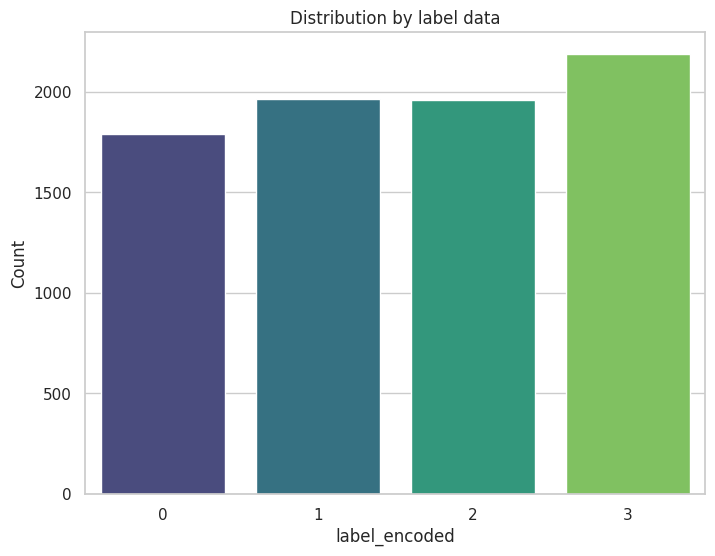

In [ ]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# 분포 시각화
sns.countplot(x='label_encoded', data=df, palette='viridis')

# 그래프 제목과 라벨 설정
plt.title('Distribution by label data')
plt.xlabel('label_encoded')
plt.ylabel('Count')

# 그래프 표시
plt.show()

In [4]:
from transformers import AutoTokenizer, AutoModelForCausalLM, TextGenerationPipeline
import pandas as pd
import random

MODEL_NAME = "meta-llama/Llama-2-7b-chat-hf"

# 모델 및 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
language_model = AutoModelForCausalLM.from_pretrained(MODEL_NAME)

text_generation_pipeline = TextGenerationPipeline(
    model=language_model,
    tokenizer=tokenizer,
    device=0,
    max_length=512,  # 생성할 텍스트의 최대 길이
    do_sample=True,  # 샘플링을 통해 다양한 결과를 얻을 수 있도록 설정
    num_return_sequences=1  # 생성할 문장의 수 (한 문장만 생성)
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [13]:
from tqdm import tqdm

# Label_encoded가 0인 행 선택
label_0_rows = df[df['label_encoded'] == 0]

# 데이터프레임에 추가할 빈 리스트 초기화
augmented_conversations = []
augmented_data = pd.DataFrame(columns=df.columns)

# 선택한 행을 기반으로 데이터 증강 (500개)
for _ in tqdm(range(500), desc="Augmenting"):
    # 무작위로 하나의 행 선택
    selected_row = label_0_rows.sample(n=1, random_state=random.randint(0, 1000)).iloc[0]

    # 선택한 대화 텍스트를 증강
    generated_texts = text_generation_pipeline(selected_row['conversation'], max_length=512)

    # 생성된 텍스트 중 하나를 선택하여 데이터프레임에 추가
    augmented_conversation = generated_texts[0]['generated_text']
    augmented_data = augmented_data.append(selected_row, ignore_index=True)
    augmented_data.at[augmented_data.index[-1], 'conversation'] = augmented_conversation

# 결과 확인
print(augmented_data)

Augmenting:   0%|          | 0/500 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1268: UserWarning: Input length of input_ids is 512, but `max_length` is set to 512. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
<ipython-input-13-581e13d42997>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(selected_row, ignore_index=True)
Augmenting:   2%|▏         | 10/500 [00:43<29:19,  3.59s/it]/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1268: UserWarning: Input length of input_ids is 579, but `max_length` is set to 512. This can l

     idx  class                                       conversation  \
0    134  협박 대화  아줌마 다음주부터 여기서 내가 타코야끼 팔테니까 아줌마는 다른데가서 붕어빵 팔아 저...   
1      1  협박 대화  길동경찰서입니다 시 분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 얘기한다 ...   
2    497  협박 대화  내가 사고낸거 아니야 눈으로 니가운전한거 봣거든 아 봣구나 그런데 일부러 그런것은아...   
3    377  협박 대화  죽기싫으면 한번 말할때 들으라고 내가 왜 그래야 되는데 잔말말고 하라고 이새끼 안되...   
4    706  협박 대화  야 내가 우습냐 네 내가 만만하냐고 아니요 절대요 근데 그따위로 하고다녀 제가 뭘 ...   
..   ...    ...                                                ...   
495  733  협박 대화  자네가 타이어에 구멍냈는가 무슨소리야 타이어 구멍내줘서 내가 저세상 갈뻔했네 덕분에...   
496  110  협박 대화  니네가족 한참 좋을때지 죄송합니다 죄송 이라는말 필요없고 내가 전에 얘기한거나 내놔...   
497  812  협박 대화  너 아이를 내가 데리고 있다 죄송합니다 정말 한번만 봐주세요 제 귀한 자식입니다 너...   
498  598  협박 대화  빌린 돈 당장 갚아 당장은 돈이 없습니다 내일까지 계좌로 오백 보내 당장 내일까지요...   
499  219  협박 대화  어떻게 너 같은 애가 오빠랑 결혼을 할 수가 있어 선아야 무슨 말을 그렇게 해 너희...   

    label_encoded  
0               0  
1               0  
2               0  
3               0  
4               0  
..            ...  
495             0  

In [14]:
# pd.set_option('display.max_colwidth', None)

# augmented_data

# pd.set_option('display.max_colwidth', 50)


In [15]:
augmented_data

,idx,class,conversation,label_encoded
0,134,협박 대화,아줌마 다음주부터 여기서 내가 타코야끼 팔테니까 아줌마는 다른데가서 붕어빵 팔아 저...,0
1,1,협박 대화,길동경찰서입니다 시 분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 얘기한다 ...,0
2,497,협박 대화,내가 사고낸거 아니야 눈으로 니가운전한거 봣거든 아 봣구나 그런데 일부러 그런것은아...,0
3,377,협박 대화,죽기싫으면 한번 말할때 들으라고 내가 왜 그래야 되는데 잔말말고 하라고 이새끼 안되...,0
4,706,협박 대화,야 내가 우습냐 네 내가 만만하냐고 아니요 절대요 근데 그따위로 하고다녀 제가 뭘 ...,0
...,...,...,...,...
495,733,협박 대화,자네가 타이어에 구멍냈는가 무슨소리야 타이어 구멍내줘서 내가 저세상 갈뻔했네 덕분에...,0
496,110,협박 대화,니네가족 한참 좋을때지 죄송합니다 죄송 이라는말 필요없고 내가 전에 얘기한거나 내놔...,0
497,812,협박 대화,너 아이를 내가 데리고 있다 죄송합니다 정말 한번만 봐주세요 제 귀한 자식입니다 너...,0
498,598,협박 대화,빌린 돈 당장 갚아 당장은 돈이 없습니다 내일까지 계좌로 오백 보내 당장 내일까지요...,0


In [17]:
augmented_data.to_csv('/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/augmented_data.csv', index=False)

In [19]:
def preprocess_text(text):
    # 한글과 공백을 제외한 모든 문자 제거
    text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', text)
    # 여러 개의 연속 공백을 하나의 공백으로 변환
    text = re.sub(r'\s+', ' ', text)
    # 양 끝 공백 제거
    text = text.strip()
    return text

In [20]:
augmented_data['conversation'] = augmented_data['conversation'].apply(preprocess_text)

In [21]:
df = pd.read_csv('/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/data/LLaMa2_Augmentation_trian.csv')

LLaMa2_Augmentation_trian = pd.concat([df, augmented_data], ignore_index=True)
LLaMa2_Augmentation_trian.to_csv("/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/LLaMa2_Augmentation_trian.csv", index=False)

In [22]:
df = pd.read_csv('/content/drive/MyDrive/모두의 연구소/Aiffel/DLcon/LLaMa2_Augmentation_trian.csv')
df

,idx,class,conversation,label_encoded
0,0,협박 대화,너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자 죽지 우...,0
1,1,협박 대화,길동경찰서입니다 시 분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 얘기한다 ...,0
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...,3
3,3,갈취 대화,어이 거기 예 너 말이야 너 이리 오라고 무슨 너 옷 좋아보인다 얘 돈 있나봐 아니...,1
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요 저희 회사에서 선크림 파는데 손등에 발라보실래요 ...,1
...,...,...,...,...
8395,733,협박 대화,자네가 타이어에 구멍냈는가 무슨소리야 타이어 구멍내줘서 내가 저세상 갈뻔했네 덕분에...,0
8396,110,협박 대화,니네가족 한참 좋을때지 죄송합니다 죄송 이라는말 필요없고 내가 전에 얘기한거나 내놔...,0
8397,812,협박 대화,너 아이를 내가 데리고 있다 죄송합니다 정말 한번만 봐주세요 제 귀한 자식입니다 너...,0
8398,598,협박 대화,빌린 돈 당장 갚아 당장은 돈이 없습니다 내일까지 계좌로 오백 보내 당장 내일까지요...,0


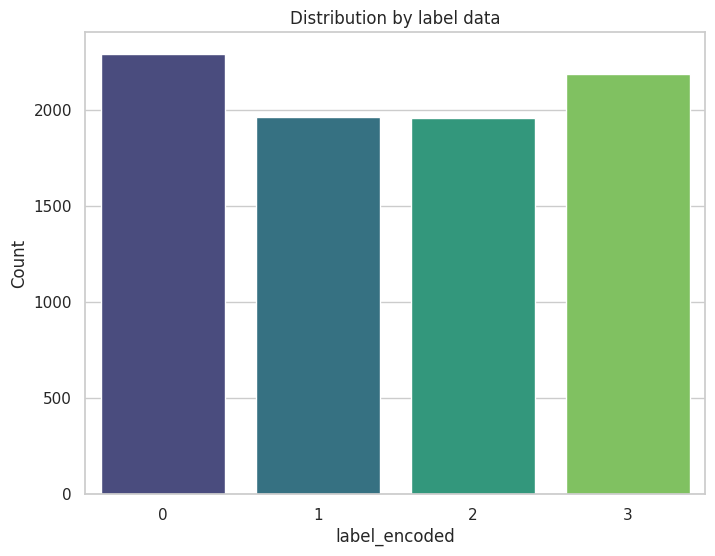

In [23]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# 분포 시각화
sns.countplot(x='label_encoded', data=df, palette='viridis')

# 그래프 제목과 라벨 설정
plt.title('Distribution by label data')
plt.xlabel('label_encoded')
plt.ylabel('Count')

# 그래프 표시
plt.show()